In [1]:
# Ресурси
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Алгоритм HCS

In [3]:
# Перевіряє, чи є граф G високозв’язним. Приймає граф G та ребра, необхідні для його розбиття.
# Високозв'язність означає, що для розбиття графа G на підграфи потрібно більше 0,5*|V| видалення країв.
def highlyConnected(G, E):
    return len(E) > len(G.nodes) / 2

In [4]:
# Видаляє всі ребра E з G
def remove_edges(G, E):
    for edge in E:
        G.remove_edge(*edge)
    return G

In [5]:
def hcsClustering(G):
    G_ = G.copy() # Копія графа для безпечних модифікацій
    E = nx.algorithms.connectivity.cuts.minimum_edge_cut(G_) # Ребра, що є мінімальними розрізами графа

    # Якщо граф не є високо зв'язнаним за мінімальними розрізами, видаляємо відповідні ребра
    if not highlyConnected(G_, E):
        G_ = remove_edges(G_, E)
        subGraphs = [G_.subgraph(c).copy() for c in nx.connected_components(G_)]

        if len(subGraphs) == 2:
            H = hcsClustering(subGraphs[0])
            _H = hcsClustering(subGraphs[1])

            G_ = nx.compose(H, _H)

    return G_

In [6]:
# Приймає граф, повертає інфу про кластери у форматі [1,1,1,2,2,3]
def hcsClusteringLabelled(G):
    _G = hcsClustering(G)

    subGraphs = (G.subgraph(c).copy() for c in nx.connected_components(_G))


    labels = np.zeros(shape=(len(G)), dtype=np.uint16)

    for _class, _cluster in enumerate(subGraphs, 1):
        c = list(_cluster.nodes)
        labels[c] = _class

    return labels

In [11]:
# Візуалізація графу
def plotUnweightedGraph(G, pos=None, nodeSize=700, nodeColor='skyblue', fontColor='black', withLabels=True, fontWeight='bold'):
    nx.draw(G, pos, with_labels=withLabels, node_size=nodeSize, node_color=nodeColor, font_color=fontColor, font_weight=fontWeight)
    plt.show()

### Приклад застосування

In [17]:
# Ініціалізація графа

# Вершини графа
v = {'Dublin': 0, 
     'London': 1, 
     'Paris': 2, 
     'Amsterdam': 3, 
     'Madrid': 4,
     'Lisbon': 5, 
     'Zurich': 6, 
     'Geneva': 7, 
     'Bern': 8, 
     'Berlin': 9,
     'Vienna': 10, 
     'Budapest': 11, 
     'Prague': 12, 
     'Warsaw': 13,
     'Kyiv': 14, 
     'Oslo': 15, 
     'Helsinki': 16}

# Випадкова матриця суміжності
def randAdjacency(vertices_number):
    adjacency = np.random.randint(2, size=(vertices_number, vertices_number), dtype=np.uint8)  # Задаємо випадково
    adjacency = np.triu(adjacency) + np.triu(adjacency, 1).T  # Робимо симетричною
    np.fill_diagonal(adjacency, 0)  # Обнуляємо діагональ

adjacency = np.zeros(shape=(len(v), len(v)), dtype=np.uint8)  # Матриця суміжності

# Задаємо зв'язки
adjacency[v['Dublin'], 
          [v['London'], v['Paris'], v['Amsterdam'], v['Madrid'], v['Lisbon']]] = 1

adjacency[v['London'], 
          [v['Paris'], v['Amsterdam'], v['Madrid'], v['Lisbon'], v['Zurich'], v['Bern']]] = 1

adjacency[v['Paris'], 
          [v['Amsterdam'], v['Madrid'], v['Lisbon'], v['Berlin']]] = 1

adjacency[v['Amsterdam'], 
          [v['Madrid'], v['Lisbon'], v['Berlin']]] = 1

adjacency[v['Madrid'], 
          [v['Lisbon']]] = 1

adjacency[v['Lisbon'], 
          [v['Vienna'], v['Budapest']]] = 1

adjacency[v['Zurich'], 
          [v['Bern'], v['Geneva']]] = 1

adjacency[v['Geneva'], 
          [v['Bern']]] = 1

adjacency[v['Berlin'], 
          [v['Budapest'], v['Prague'], v['Warsaw'], v['Vienna'], v['Oslo'], v['Helsinki']]] = 1

adjacency[v['Vienna'], 
          [v['Budapest'], v['Prague'], v['Warsaw'], v['Kyiv'], v['Oslo'], v['Helsinki']]] = 1

adjacency[v['Budapest'], 
          [v['Prague'], v['Warsaw'], v['Kyiv'], v['Oslo'], v['Helsinki']]] = 1

adjacency[v['Prague'], 
          [v['Warsaw'], v['Kyiv'], v['Oslo'], v['Helsinki']]] = 1

adjacency[v['Warsaw'], 
          [v['Kyiv']]] = 1

adjacency[v['Kyiv'], 
          [v['Oslo']]] = 1

adjacency[v['Oslo'], 
          [v['Helsinki']]] = 1

adjacency = np.triu(adjacency) + np.triu(adjacency, 1).T  # Робимо симетричною


g = nx.from_numpy_matrix(adjacency) # Матриця, що задає граф

print(adjacency)
### Приклад застосування

[[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1]
 [0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0]]


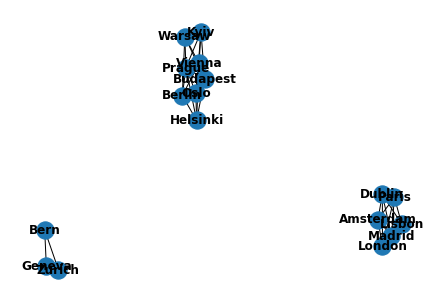

In [8]:
# Застосування методів кластеризації
gSplitted = hcsClustering(g)

# Виводимо результати
nx.draw(gSplitted, with_labels=True, labels = verticesLabels, font_weight='bold')
plt.show()

In [ ]:
# Приклад графу для поділу
G = nx.Graph()
G.add_nodes_from(range(1, 7))
edges = [(1, 2), (1, 4), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (5, 6)]
G.add_edges_from(edges)

pos = nx.circular_layout(G)
plotUnweightedGraph(G, pos=pos)

gSplitted = hcsClustering(G)
plotUnweightedGraph(gSplitted, pos=pos)

## Алгоритм MST 

In [20]:
import heapq  # heap queue

In [21]:
# Реалізація алгоритму Прима для пошуку мінімального кістякового дерева
# Приймає граф в контексті networkx, повертає ребра дерева
def primsAlgorithm(graph):
    graphDict = nx.to_dict_of_dicts(graph)  # Перетворюємо граф у зручну для аналізу форму
    
    treeNodes = set()  # Список для зберігання вершин МКД
    startNode = list(graphDict.keys())[0]  # Вибір початкової вершини (можна вибрати будь-яку)
    treeNodes.add(startNode)  # Додавання початкової вершини до дерева
    treeEdges = []  # Список для зберігання ребер МКД
    
    edges = [(data['weight'], startNode, neighbor) for neighbor, data in graphDict[startNode].items()]  # Створення списку ребер для початкової вершини
    heapq.heapify(edges)  # Сортування списку ребер за вагою

    while edges:
        weight, currentNode, nextNode = heapq.heappop(edges)  # Вибір ребра з найменшою вагою
        
        # Якщо вершина nextNode ще не у МКД, додаємо її та відповідне ребро
        if nextNode not in treeNodes:
            treeEdges.append((currentNode, nextNode, weight))
            treeNodes.add(nextNode)
            
            # Додавання ребер, що виходять з нової вершини, до edges
            for neighbor, data in graphDict[nextNode].items():
                if neighbor not in treeNodes:
                    heapq.heappush(edges, (data['weight'], nextNode, neighbor))
                    
    return treeEdges

In [22]:
def kruskalAlgorithm(graph):
    # Ініціалізація змінних
    minSpanningTree = []  # Ребра мінімального кістякового дерева
    edgeHeap = []  # Купа (heap) для ефективного вибору ребра з мінімальною вагою
    nodeSets = []  # Список наборів вершин (для визначення з'єднаних компонентів)

    # Додавання ребер графа до купи
    for edge in graph.edges(data=True):
        heapq.heappush(edgeHeap, (edge[2]['weight'], edge[0], edge[1]))

    # Створення окремого набору вершин для кожної вершини графа
    for node in graph.nodes():
        nodeSets.append({node})

    # Головний цикл алгоритму Краскала
    while edgeHeap:
        weight, u, v = heapq.heappop(edgeHeap)

        # Знайдення компонентів, до яких належать вершини
        u_set = None
        v_set = None

        for node_set in nodeSets:
            if u in node_set:
                u_set = node_set
            if v in node_set:
                v_set = node_set

        # Перевірка чи ребро не утворює цикл
        if u_set != v_set:
            minSpanningTree.append((u, v, weight))
            
            # Об'єднання двох компонентів в одну
            u_set.update(v_set)
            nodeSets.remove(v_set)

    return minSpanningTree

In [23]:
# Фукнція реалізовує видалення ребер у порядку спадання доти, поки не отримаємо бажану кількість компонентів зв'язності
def removeEdgesForClusters(minSpanningTreeGraph, clustersNumber):
    # Видалення ребер у порядку спадання ваги
    sortedEdges = sorted(minSpanningTreeGraph.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    
    # Прибирання ребер для досягнення k компонентів зв'язності
    for edge in sortedEdges:
        minSpanningTreeGraph.remove_edge(edge[0], edge[1])
        if nx.number_connected_components(minSpanningTreeGraph) == clustersNumber:
            break

    # Повертання ребер та їх ваг у вигляді списку кортежів
    resultEdges = [(edge[0], edge[1], edge[2]['weight']) for edge in minSpanningTreeGraph.edges(data=True)]
    return resultEdges

In [24]:
# Фінальна функція, яка реалізує кластеризацію графа на бажану кількість кластерів
def mstClustering(graph, clustersNumber):
    # Робимо мінімальне кістякове дерево за методом Прима
    minSpanningTree = primsAlgorithm(graph)
    
    # Створення графа з мінімального кістякового дерева
    T = nx.Graph()
    for edge in minSpanningTree:
        T.add_edge(edge[0], edge[1], weight=edge[2])
    
    # Видаляємо ребра, поки не отримаємо потрібну кількість компонентів зв'яфзності
    result = removeEdgesForClusters(T, clustersNumber)
    return result

In [25]:
# Візуалізація графу
def plotWeightedGraph(G, pos=None, nodeSize=700, nodeColor='skyblue', fontColor='black', withLabels=True, fontWeight='bold'):
    edgeLabels = {(i, j): d['weight'] for i, j, d in G.edges(data=True)}
    nx.draw(G, pos, with_labels=withLabels, node_size = nodeSize, node_color=nodeColor, font_color=fontColor, font_weight=fontWeight)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edgeLabels)
    plt.show()

### Приклад застосування

In [26]:
# Приклад графу для поділу
G = nx.Graph()
G.add_nodes_from(range(1, 7))
edges = [(1, 2, 7), (1, 4, 9), (2, 3, 8), (2, 4, 12), (3, 5, 7), (4, 5, 4), (4, 6, 5), (5, 6, 6)]
G.add_weighted_edges_from(edges)

In [27]:
# Приклад застосування алгоритму Прима

# Отримаємо ребра МКД
minimumSpanningTree = primsAlgorithm(G)

# Робимо граф з отриманих ребер
T = nx.Graph()
T.add_nodes_from(range(1, 7))
T.add_weighted_edges_from(minimumSpanningTree)

In [28]:
# Приклад застосування алгоритму крастеризації з використання МКД

# Задайте кількість бажаних кластерів
clustersNumber = 3

# Отримаємо ребра всередині кластерів
clustersEdges = mstClustering(G, clustersNumber)

# Робимо граф з отриманих ребер
C = nx.Graph()
C.add_nodes_from(range(1, 7))
C.add_weighted_edges_from(clustersEdges)

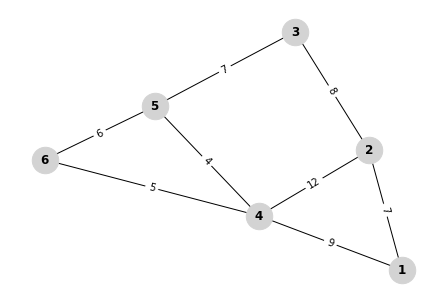

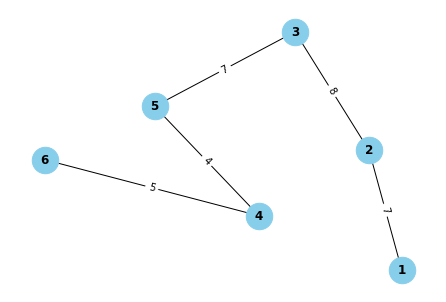

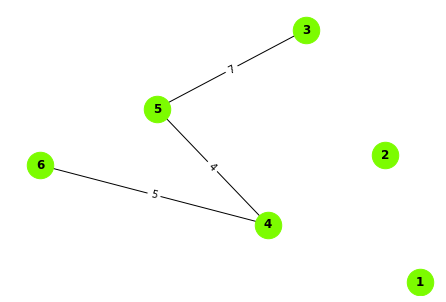

In [29]:
# Візуалізуємо результати
pos = nx.spring_layout(G)  # Вибираємо позиції вузлів для відображення
plotWeightedGraph(G, pos, nodeColor='lightgray')
plotWeightedGraph(T, pos, nodeColor='skyblue')
plotWeightedGraph(C, pos, nodeColor='lawngreen')